# Smarket Analysis

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/yashre-bh/ISL-Python-datasets/main/Smarket.csv')
data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


## Summary of the dataset

In [133]:
data.shape

(1250, 9)

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


In [135]:
data.isnull().sum()

Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64

In [136]:
data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


## Correlation matrix

In [137]:
data.iloc[:, 0:-2].corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000


#### There is a significant correlation between Year and Volume

# Logistic Regression

#### The direction has to be predicted using Lag1 through Lag5 and Volume:

In [138]:
data.Direction[data.Direction == "Up"] = 1
data.Direction[data.Direction == "Down"] = 0
data.head()


<ipython-input-138-731028174b47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Direction[data.Direction == "Up"] = 1
<ipython-input-138-731028174b47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Direction[data.Direction == "Down"] = 0


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,1


In [139]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [140]:
datanew1 = data[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Direction']]
datanew1['Direction']=datanew1['Direction'].astype(float)
datanew1.head()


<ipython-input-140-b993d4555d4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew1['Direction']=datanew1['Direction'].astype(float)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,1.0
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.0
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,0.0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,1.0
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,1.0


In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X = datanew1[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']]
y = datanew1['Direction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [143]:
log_reg1 = sm.Logit(y_train, X_train).fit()


Optimization terminated successfully.
         Current function value: 0.692226
         Iterations 3


In [144]:
log_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            5
Date:                Wed, 28 Apr 2021   Pseudo R-squ.:               0.0005904
Time:                        17:59:26   Log-Likelihood:                -692.23
converged:                       True   LL-Null:                       -692.64
Covariance Type:            nonrobust   LLR p-value:                    0.9759
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag1          -0.0464      0.056     -0.821      0.412      -0.157       0.064
Lag2           0.0022      0.056      0.038      0.969      -0.108       0.113
Lag3          -0.0067      0.056     -0.120      0.905      -0.116       0.102
Lag4          -0.0024      0.056     -0.043      0.965      -0.112       0.107
Lag5           0.0046      0.055      0.083      0.934      -0.104       0.113
Volume         0.0443      0.042      1.066      0.287      -0.037       0.126
==============================================================================
"""

In [145]:
y_predicted = log_reg1.predict(X_test)
prediction = list(map(round, y_predicted))

In [146]:
print('Acutal values', y_test)
print('Predictions :', prediction)

Acutal values 272     0.0
26      0.0
986     1.0
985     1.0
443     1.0
       ... 
346     0.0
34      1.0
976     1.0
607     1.0
1090    1.0
Name: Direction, Length: 250, dtype: float64
Predictions : [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]


In [147]:
from sklearn.metrics import (confusion_matrix, plot_confusion_matrix, accuracy_score)
cm = confusion_matrix(y_test, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[ 14 104]
 [ 14 118]]
Test accuracy =  0.528


# Linear Discriminant Analysis

In [148]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [149]:
ldisc = LinearDiscriminantAnalysis()

In [150]:
data_bef = data[data['Year'] < 2005]
data_bef['Direction']=data_bef['Direction'].astype(float)
data_bef

<ipython-input-150-b1431c7772b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bef['Direction']=data_bef['Direction'].astype(float)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1.0
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,1.0
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,0.0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,1.0
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,1.0
...,...,...,...,...,...,...,...,...,...
993,2004,0.046,0.342,0.904,0.038,-0.749,0.9561,-0.431,0.0
994,2004,-0.431,0.046,0.342,0.904,0.038,0.9220,0.715,1.0
995,2004,0.715,-0.431,0.046,0.342,0.904,0.9830,-0.007,0.0
996,2004,-0.007,0.715,-0.431,0.046,0.342,0.9259,0.008,1.0


In [151]:
data_aft = data[data['Year'] == 2005]
data_aft['Direction']=data_aft['Direction'].astype(float)
data_aft

<ipython-input-151-d59544ca81ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_aft['Direction']=data_aft['Direction'].astype(float)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
998,2005,-0.134,0.008,-0.007,0.715,-0.431,0.78690,-0.812,0.0
999,2005,-0.812,-0.134,0.008,-0.007,0.715,1.51080,-1.167,0.0
1000,2005,-1.167,-0.812,-0.134,0.008,-0.007,1.72100,-0.363,0.0
1001,2005,-0.363,-1.167,-0.812,-0.134,0.008,1.73890,0.351,1.0
1002,2005,0.351,-0.363,-1.167,-0.812,-0.134,1.56910,-0.143,0.0
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,1.0
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,0.0
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,1.0
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,0.0


In [152]:
X2_train = data_bef.iloc[:, 1:-1].values
y2_train = data_bef.iloc[:, -1].values
X2_test = data_aft.iloc[:, 1:-1].values
y2_test = data_aft.iloc[:, -1].values

In [153]:
ldisc.fit(X2_train, y2_train)

LinearDiscriminantAnalysis()

In [154]:
y_cap_ldisc = ldisc.predict(X2_test)

In [155]:
print(ldisc.score(X2_test, y2_test))

0.9682539682539683


In [156]:
cm_Ldisc = confusion_matrix(y2_test, y_cap_ldisc)

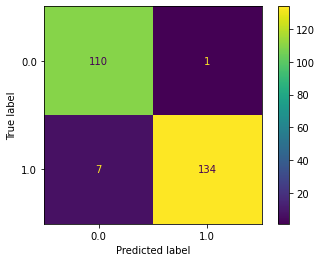

In [157]:
plot_confusion_matrix( ldisc, X2_test, y2_test)  
plt.show()  

## Quadratic Discriminant Analysis

In [158]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [159]:
qdisc = QuadraticDiscriminantAnalysis()

In [160]:
qdisc.fit(X2_train, y2_train)

QuadraticDiscriminantAnalysis()

In [161]:
y_cap_qdisc = qdisc.predict(X2_test)


In [162]:
print(qdisc.score(X2_test, y2_test))

0.9285714285714286


In [163]:
cm_qdisc = confusion_matrix(y2_test, y_cap_qdisc)

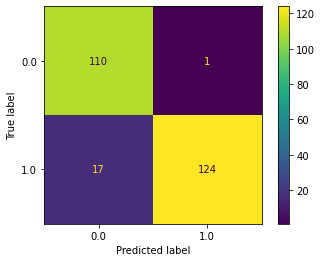

In [164]:
plot_confusion_matrix( qdisc, X2_test, y2_test)  
plt.show()  

# KNN

In [165]:
from sklearn.neighbors import KNeighborsClassifier

In [166]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
print(knn.predict(X_test))
print("Accuracy Score: ", knn.score(X_test, y_test))

[0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]
Accuracy Score:  0.532


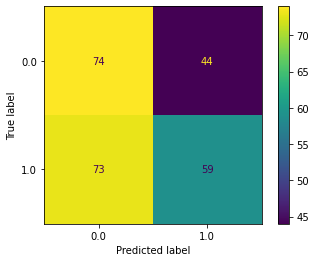

In [167]:
plot_confusion_matrix(knn, X_test, y_test)  
plt.show()  
